# [Wikidata-Taxonomy](https://wdtaxonomy.readthedocs.io/en/latest/README.html)
## Prerequisites
Please run the prerequiste cells before trying the examples.
### Install python module dependencies

In [68]:
import sys
def installModule(projectName:str, moduleName:str=None):
    '''Installs and loads the given module if not already installed'''
    if moduleName is None:
        moduleName=projectName
    !python -m pip install -U --no-input $projectName
    print(f'{projectName} installed')
    %reload_ext $moduleName

installModule('graphviz')

graphviz installed


### Install Wikidata-Taxonomy

In [ ]:
!npm install -g wikidata-taxonomy

### Helper Functions

In [ ]:
import graphviz
def plotTaxonomy(wikidataId:str):
    """
    Plots the taxonomy of the given wikidata entity as an graph
    
    Args:
        wikidataId(str): wikidataId e.g. "Q634"
        
    Returns:
        graphviz directed graph
    """
    dot = graphviz.Digraph(comment=f'Taxonomy of {wikidataId}')
    dot.attr(rankdir='RL')
    
    # Execute wdtaxonomy and store output in variable   
    taxonomy = !wdtaxonomy $wikidataId -f csv
    taxonomy=[t.split(",") for t in taxonomy]
    headers=taxonomy.pop(0)
    hierarchyBacklog={}
    for t in taxonomy:
        level=t[0].count("-")
        wId=t[1]
        label=t[2]
        dot.node(wId, label)
        hierarchyBacklog[level]=wId
        if level>0:            
            dot.edge(wId,hierarchyBacklog[level-1])
    return dot

## Usage
wikidata-Taxonomy is a command-line tool that can be used inside of jupyter notebooks by adding a leading exclamation mark before the command. Allowing to use and store the results of cmd-line tools.

For more details look into the [documentation of the tool](https://wdtaxonomy.readthedocs.io/en/latest/README.html).

In [ ]:
!wdtaxonomy -h

### Summarizing the Taxonomy
To get the taxonomy of the [planet](https://www.wikidata.org/wiki/Q634) entity we call the following:

In [ ]:
!wdtaxonomy Q634

Instead of the cmd-line output the taxonomy can also be ploted as graphy by using the __plotTaxonomy()__ function.

In [ ]:
plotTaxonomy("Q634")

### Taxonomy Summarization Query
By adding __-s__ to the wdtaxonomy command the query that is used to summarize the entity taxonomy is printed out.

In [ ]:
!wdtaxonomy Q486972  -c -d -m = -s

## Further Examples

### [hospital](https://www.wikidata.org/wiki/Q16917) generalization / specialization

In [69]:
!wdtaxonomy Q16917 -c -d -m =

hospital (Q16917) •134 ×24965 ↑↑↑↑ =http://dbpedia.org/ontology/Hospital =https://schema.org/Hospital
│ health care institution
├──hospital (Q180370) •5 ×112 ↑↑
│  ancient medical center and nursing home
├──psychiatric hospital (Q210999) •45 ×551
│  hospital treating serious mental disorders
├──??? (Q339449) •2
├──children's hospital (Q644264) •10 ×121
│  hospital which offers its services exclusively to children
├──dispensary (Q688829) •20 ×22 ↑
│  organization that dispenses medications, medical supplies, and in some cases even medical treatment
├──policlinic (Q695416) •27 ×64
│  most languages use a cognate of the rare English term "policlinic" (not "polyclinic") for hospital departments and independent clinics for outpatients
├──lazaretto (Q859247) •26 ×30 ↑
│  military or maritime quarantine station
├──Bundeswehr hospital (Q1009272) •2 ×6 ↑
│  hospital that is operated by the German military
├──Bimarestan (Q1293141) •12 ×6
│  hospital in the medieval Islamic world
├──specialist ho

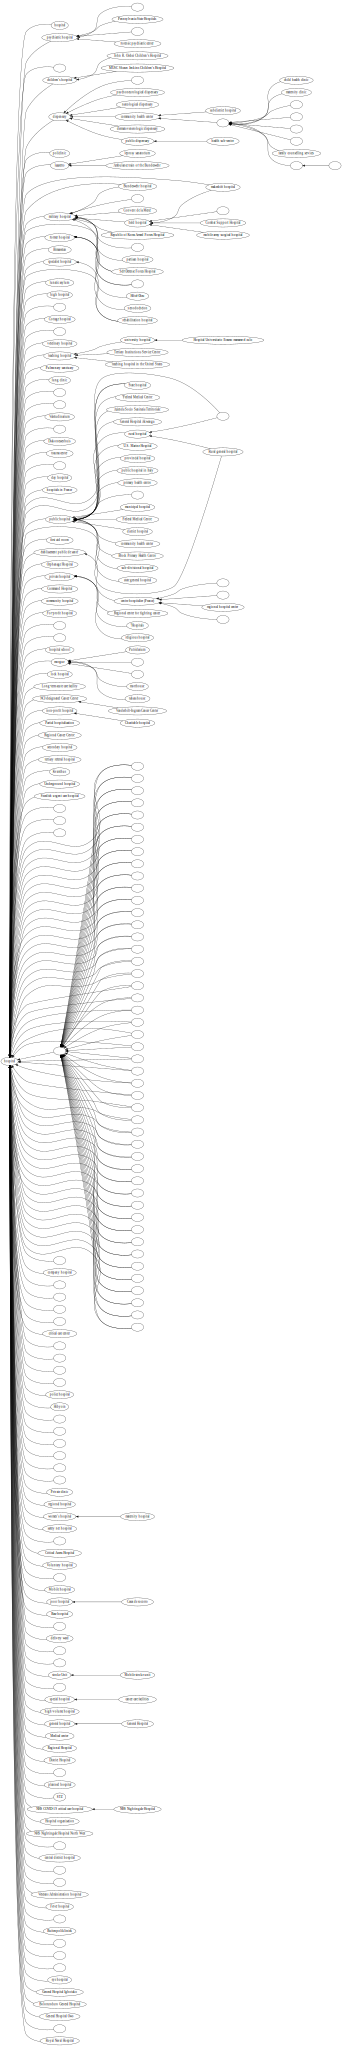

In [71]:
plotTaxonomy("Q16917") #Some subclasses of hospital seem to assign the labels differently as the labels are not extracted for some of the them

### Taxonomy of [Human settlement](https://www.wikidata.org/wiki/Q486972)

#### wdtaxonomy command

In [ ]:
!wdtaxonomy Q486972 -c -d -m =

#### Taxonomy Graph

In [ ]:
g=plotTaxonomy("Q486972")
g.format = 'svg'
# uncomment to generate a svg. The svg version of the graph is more readable and can be opened from the notebook by 'right click' → 'Open in New Browser Tab' on the generated svg-file.
#g.render()
g